1. Qual é o total de receita (gross income) gerado por cada filial (Branch)?

2. Qual filial teve a maior média de vendas?

3. Qual é o produto mais vendido (por Product line)?

4. Qual é o dia da semana com maior volume de vendas?

5. Qual é o mês com maior receita total?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importando Arquivo:
df = pd.read_excel(r'C:\Users\USER\OneDrive\Documentos\Repos\Projeto\supermarket_sales.xlsx')

df1 = df.copy()

# Verificando os tipos de dados
display(df1.dtypes)

# Limpando a coluna Date
df1['Date'] = pd.to_datetime(df1['Date'], errors='coerce')
df1['Dia_Semana'] = df1['Date'].dt.day_name()
df1['Mes'] = df1['Date'].dt.month_name()
df1['Date'] = df1['Date'].dt.date

display(df1.head())

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Dia_Semana,Mes
0,692-92-5582,B,Mandalay,Member,Female,Food_and_beverages,54.84,3,8.226,172.746,2019-02-20,13:27:00,Credit card,164.52,4.761905,8.226,5.9,Wednesday,February
1,351-62-0822,B,Mandalay,Member,Female,Fashion_accessories,14.48,4,2.896,60.816,2019-06-02,18:07:00,Ewallet,57.92,4.761905,2.896,4.5,Sunday,June
2,529-56-3974,B,Mandalay,Member,Male,Electronic_accessories,25.51,4,5.102,107.142,2019-09-03,17:03:00,Cash,102.04,4.761905,5.102,6.8,Tuesday,September
3,299-46-1805,B,Mandalay,Member,Female,Sports_and_travel,93.72,6,28.116,590.436,2019-01-15,16:19:00,Cash,562.32,4.761905,28.116,4.5,Tuesday,January
4,319-50-3348,B,Mandalay,Normal,Female,Home_and_lifestyle,40.30,2,4.030,84.630,2019-11-03,15:30:00,Ewallet,80.60,4.761905,4.030,4.4,Sunday,November


1. Qual é o total de receita (gross income) gerado por cada filial (Branch)?

In [2]:
resultado = df1.loc[: , ['Branch', 'gross income']].groupby('Branch').sum().reset_index()
print('O faturamento da Branch A foi de R${:,.2f}, da Branch B foi de R${:,.2f}, e da Branch C foi de R${:,.2f}.'.format(resultado.loc[0, 'gross income'], resultado.loc[1, 'gross income'], resultado.loc[2, 'gross income']))

O faturamento da Branch A foi de R$5,057.16, da Branch B foi de R$5,057.03, e da Branch C foi de R$5,265.18.


2. Qual filial teve a maior média de vendas?

A Branch com maior média de faturamento foi a Branch C, com 337.10 de média


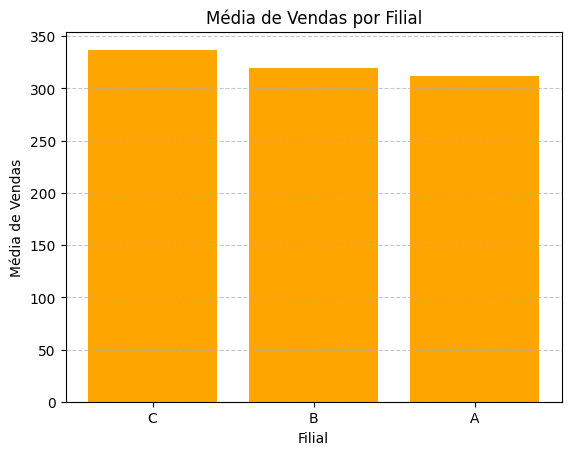

In [32]:
resultado = df1.loc[: , ['Branch', 'Total']].groupby('Branch').mean().sort_values('Total', ascending=False).reset_index()

print('A Branch com maior média de faturamento foi a Branch {}, com {:.2f} de média'.format(resultado.loc[0, 'Branch'], resultado.loc[0, 'Total']))
plt.bar(resultado['Branch'], resultado['Total'], color='orange')
plt.title('Média de Vendas por Filial')
plt.xlabel('Filial')
plt.ylabel('Média de Vendas')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Qual é o produto mais vendido (por Product line)?

O produto com maior número de vendas foi o produto Electronic_accessories, com 971 vendas.


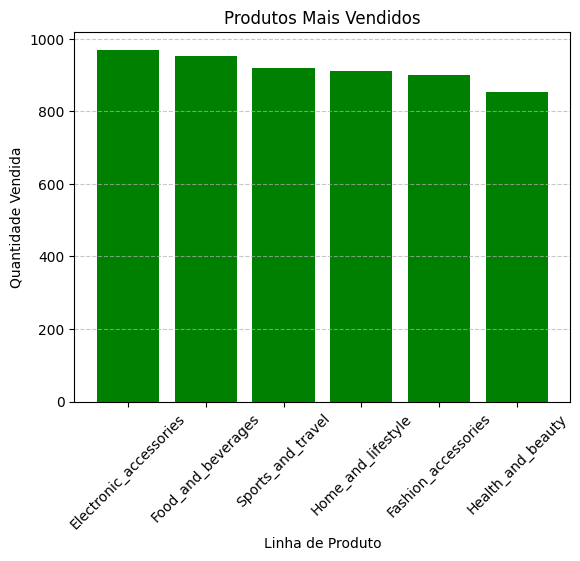

In [33]:
resultado = df1.loc[: , ['Product line', 'Quantity']].groupby('Product line').sum().sort_values('Quantity', ascending=False).reset_index()

print('O produto com maior número de vendas foi o produto {}, com {} vendas.'.format(resultado.loc[0, 'Product line'], resultado.loc[0, 'Quantity']))
plt.bar(resultado['Product line'], resultado['Quantity'], color='green')
plt.title('Produtos Mais Vendidos')
plt.xlabel('Linha de Produto')
plt.ylabel('Quantidade Vendida')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

4. Qual é o dia da semana com maior volume de vendas?

O dia da semana que mais realizou vendas foi o dia Tuesday, realizando 159 vendas.


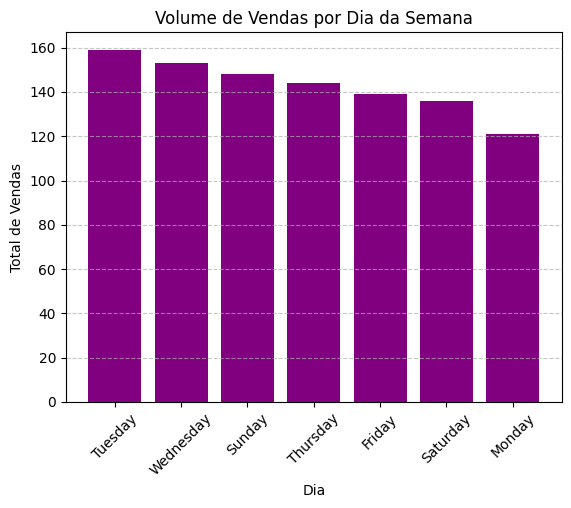

In [34]:
resultado = df1.loc[:, ['Dia_Semana', 'Invoice ID']].groupby('Dia_Semana').count().sort_values('Invoice ID', ascending=False).reset_index()

print('O dia da semana que mais realizou vendas foi o dia {}, realizando {} vendas.'.format(resultado.loc[0, 'Dia_Semana'], resultado.loc[0, 'Invoice ID']))

plt.bar(resultado['Dia_Semana'], resultado['Invoice ID'], color='purple')
plt.title('Volume de Vendas por Dia da Semana')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

5. Qual é o mês com maior receita total?

O mês com maior faturamento foi o mês de January, com R$86,562.57 de faturamento.


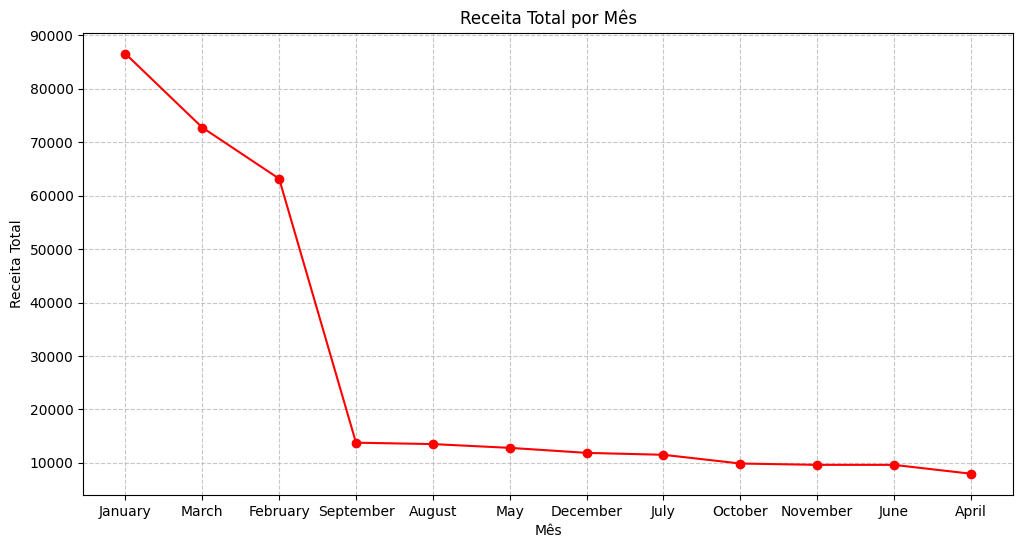

In [37]:
resultado = df1.loc[:, ['Mes', 'Total']].groupby('Mes').sum().sort_values('Total', ascending=False).reset_index()

print('O mês com maior faturamento foi o mês de {}, com R${:,.2f} de faturamento.'.format(resultado.loc[0, 'Mes'], resultado.loc[0, 'Total']))

plt.figure(figsize=(12, 6))
plt.plot(resultado['Mes'], resultado['Total'], marker='o', color='red')
plt.title('Receita Total por Mês')
plt.xlabel('Mês')
plt.ylabel('Receita Total')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()